In [1]:
# Crop Yield Prediction for SDG 2: Zero Hunger
# ------------------------------------------------
# Using Supervised Learning (Random Forest Regression)

# 1. Load Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load and filter maize data only
df = pd.read_csv("/content/yield_df.csv")
df = df[df['Item'] == 'Maize'].drop(columns=['Unnamed: 0', 'Item'])

In [7]:
#Initial exploration
print(f"\n Dataset Shape: {df.shape}")
print("\n First 5 Rows:")
display(df.head())


 Dataset Shape: (4121, 6)

 First 5 Rows:


,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,1990,36613,1485.0,121.0,16.37
6,Albania,1991,29068,1485.0,121.0,15.36
12,Albania,1992,24876,1485.0,121.0,16.06
18,Albania,1993,24185,1485.0,121.0,16.05
23,Albania,1994,25848,1485.0,201.0,16.96


In [8]:
print("\n Data Summary:")
display(df.info())


 Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 4121 entries, 0 to 28235
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           4121 non-null   object 
 1   Year                           4121 non-null   int64  
 2   hg/ha_yield                    4121 non-null   int64  
 3   average_rain_fall_mm_per_year  4121 non-null   float64
 4   pesticides_tonnes              4121 non-null   float64
 5   avg_temp                       4121 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 225.4+ KB


None

In [2]:
# 2. Define features and target
X = df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df['hg/ha_yield']

In [3]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [4]:
# 5. Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 4194.30
RMSE: 8015.10
R² Score: 0.91


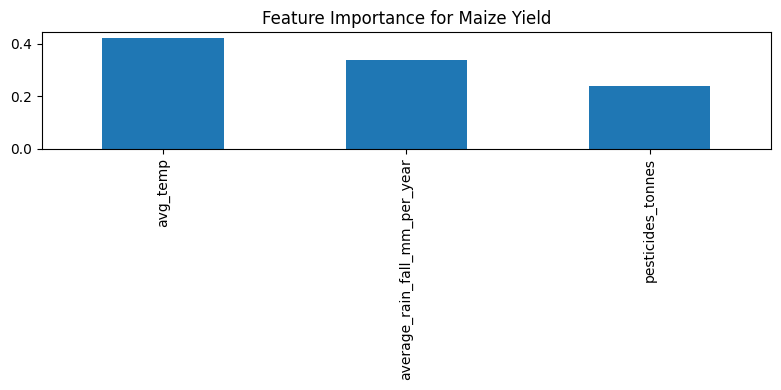

In [5]:
# 6. Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(8, 4), title='Feature Importance for Maize Yield')
plt.tight_layout()
plt.show()

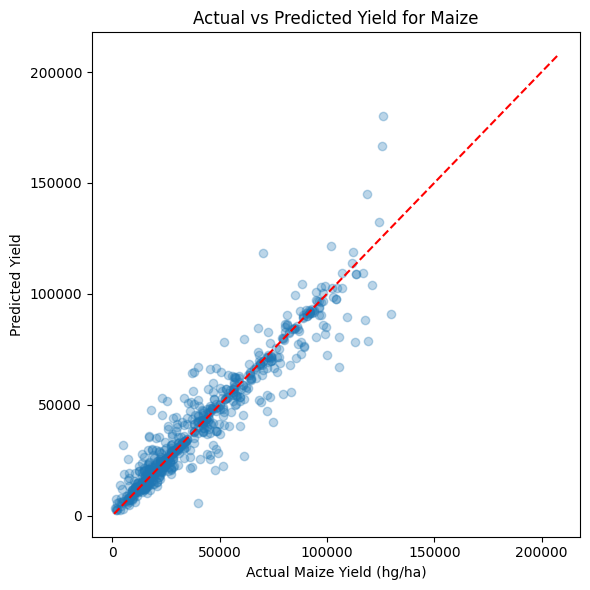

In [6]:
# 7. Actual vs Predicted Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Maize Yield (hg/ha)")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield for Maize")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()